<a href="https://colab.research.google.com/github/iftikhta/aiproject/blob/main/Final_Project_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial setup


In [ ]:
##install pycaret
!pip install pycaret --quiet
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
!unzip -q Bike-Sharing-Dataset.zip


replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
##cnt: count of total rental bikes 
##(do NOT include casual and registered columns in attributes/features

import pandas as pd
df = pd.read_csv('hour.csv')
df = df.drop(['casual',	'registered'], 1)
df


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (15641, 15)
Unseen Data For Predictions: (1738, 15)


#PyCaret - Setup enviroment

In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'cnt', session_id=123) 

,Description,Value
0,session_id,123
1,Target,cnt
2,Original Data,"(15641, 15)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(10948, 38)"


#Compare Models

In [ ]:
##compare models
best = compare_models(exclude = ['ransac'])


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.583880e+01,1.644487e+03,4.053080e+01,9.497000e-01,0.4069,0.4112,0.200
et,Extra Trees Regressor,2.588700e+01,1.778305e+03,4.209970e+01,9.457000e-01,0.3438,0.3162,4.291
rf,Random Forest Regressor,2.599040e+01,1.790111e+03,4.227970e+01,9.453000e-01,0.3470,0.3152,5.173
dt,Decision Tree Regressor,3.486150e+01,3.520563e+03,5.929650e+01,8.923000e-01,0.4495,0.3759,0.107
gbr,Gradient Boosting Regressor,4.753900e+01,4.808696e+03,6.929580e+01,8.527000e-01,0.6785,0.9366,1.270
ada,AdaBoost Regressor,8.989650e+01,1.196023e+04,1.093319e+02,6.344000e-01,1.1011,2.9645,0.772
ridge,Ridge Regression,1.043979e+02,1.950242e+04,1.396213e+02,4.039000e-01,1.2094,3.3896,0.029
br,Bayesian Ridge,1.043923e+02,1.950367e+04,1.396261e+02,4.039000e-01,1.2103,3.3848,0.046
lr,Linear Regression,1.044745e+02,1.951196e+04,1.396559e+02,4.036000e-01,1.2116,3.3931,0.303
lasso,Lasso Regression,1.051436e+02,1.987357e+04,1.409454e+02,3.926000e-01,1.2105,3.3918,0.048


#Create Best Model

In [ ]:
##Create best model
lightgbm = create_model('lightgbm')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,25.6472,1639.1577,40.4865,0.9496,0.4227,0.4490
1,26.2704,1681.9887,41.0121,0.9452,0.4507,0.4577
2,25.3021,1559.9087,39.4957,0.9548,0.4183,0.4318
3,26.6782,1854.7524,43.0668,0.9408,0.3814,0.3980
4,24.9430,1631.9576,40.3975,0.9520,0.4202,0.4601
5,27.0927,1800.8857,42.4368,0.9475,0.4060,0.4031
6,25.9633,1478.2710,38.4483,0.9521,0.4072,0.3739
7,25.2464,1562.5022,39.5285,0.9520,0.4059,0.4118
8,25.9471,1577.9437,39.7233,0.9528,0.3811,0.3729
9,25.2980,1657.5054,40.7125,0.9499,0.3750,0.3541


#Tune best Model

In [ ]:
##Tune best model
import numpy as np
# lgbm_params = {'num_leaves': np.arange(10,200,10),
#                         'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
#                         'learning_rate': np.arange(0.1,1,0.1)
#                         }
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,27.4162,1718.9481,41.4602,0.9471,0.5635,0.7358
1,26.1121,1561.2486,39.5126,0.9492,0.5364,0.6272
2,26.4034,1523.8332,39.0363,0.9558,0.4835,0.5149
3,26.4086,1660.2053,40.7456,0.9470,0.4939,0.6010
4,25.4466,1561.5665,39.5167,0.9541,0.5275,0.6392
5,27.2425,1738.7313,41.6981,0.9493,0.5174,0.5385
6,26.0696,1426.3349,37.7668,0.9538,0.4469,0.4805
7,26.2303,1643.2173,40.5366,0.9495,0.5092,0.5753
8,26.3586,1552.9621,39.4076,0.9535,0.5110,0.5440
9,26.9116,1689.4186,41.1025,0.9490,0.5056,0.5213


#Plot Model

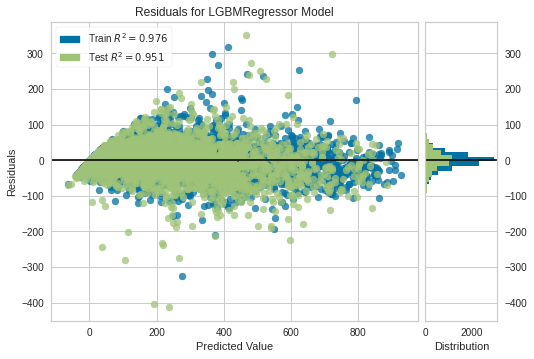

In [ ]:
##Plot best model

plot_model(tuned_lightgbm)


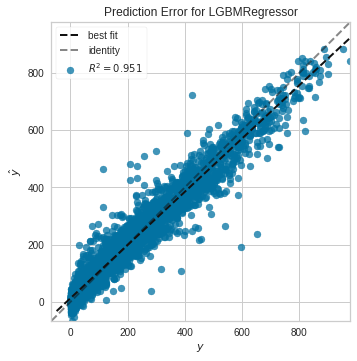

In [ ]:
plot_model(tuned_lightgbm, plot = 'error')


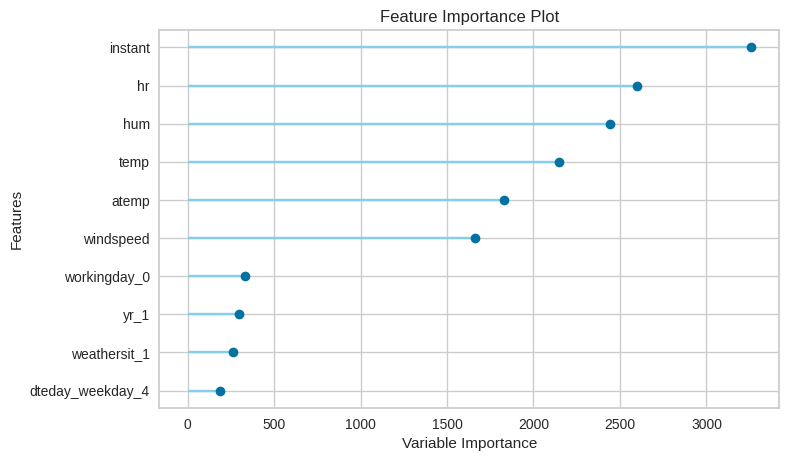

In [ ]:
plot_model(tuned_lightgbm, plot='feature')


In [ ]:
evaluate_model(tuned_lightgbm)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#Predict

In [ ]:
predict_model(tuned_lightgbm);


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,25.7792,1585.2792,39.8156,0.9513,0.5052,0.5613


# Finalize Model for Deployment



In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)
print(final_lightgbm)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
predict_model(final_lightgbm);


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,18.9733,835.3902,28.9031,0.9743,0.4397,0.4256


# Predict on unseen data

In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Label
0,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,14.379244
1,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,-11.689110
2,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8,4.582869
3,13,2011-01-01,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,84,129.587785
4,19,2011-01-01,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,35,24.751206


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.cnt, unseen_predictions.Label, 'R2')

0.9566

# Save Model

In [ ]:
save_model(final_lightgbm,'Final LightGBM Model 27Nov2021')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='cnt',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=41,
                    

# Loading Saved Model

In [ ]:
saved_final_lightgbm = load_model('Final LightGBM Model 27Nov2021')
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)
new_prediction.head()


Transformation Pipeline and Model Successfully Loaded


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Label
0,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40,14.379244
1,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1,-11.689110
2,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8,4.582869
3,13,2011-01-01,1,0,1,12,0,6,0,1,0.42,0.4242,0.77,0.2836,84,129.587785
4,19,2011-01-01,1,0,1,18,0,6,0,3,0.42,0.4242,0.88,0.2537,35,24.751206


In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction.cnt, new_prediction.Label, 'R2')

0.9566